## SUPPORT VECTOR MACHINE

In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Exploratory Data Analysis (EDA)

In [ ]:
# Load the Data

In [2]:
df=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\SVM\SVM\mushroom.csv')

In [3]:
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1995    sunken       scaly     brown     yes     foul        attached   
1996    sunken       scaly    purple     yes    musty        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
0         distant     broad       pink    tapering  ...    partial      brown   
1         crowded    narrow  chocolate   enlarging  ...  universal      brown   
2         crowded     broad     purple    tapering  ...  universal     yellow   
3           close     broad     orange   enlarging  ...    partial     yellow   
4         crowded    narrow     orange   enlarging  ...  universal      white   
...           ...       ...        ...         ...  ...        ...        ...   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1996      distant    narrow        red    tapering  ...    partial      white   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   
1999        close    narrow     purple   enlarging  ...    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
1995         one     flaring            purple   abundant   leaves  poisonous   
1996         one        zone            yellow   numerous    waste  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   
1999         two       large             white   numerous    urban  poisonous   

     stalk_height cap_diameter  
0       14.276173     5.054983  
1        3.952715    19.068319  
2        9.054265     7.205884  
3        5.226499    20.932692  
4       14.037532    12.545245  
...           ...          ...  
1995     5.877891    17.464145  
1996     6.500840    13.501957  
1997    13.558064    11.270020  
1998    11.092703     8.423199  
1999    13.066414    21.056642  

[2000 rows x 25 columns]

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

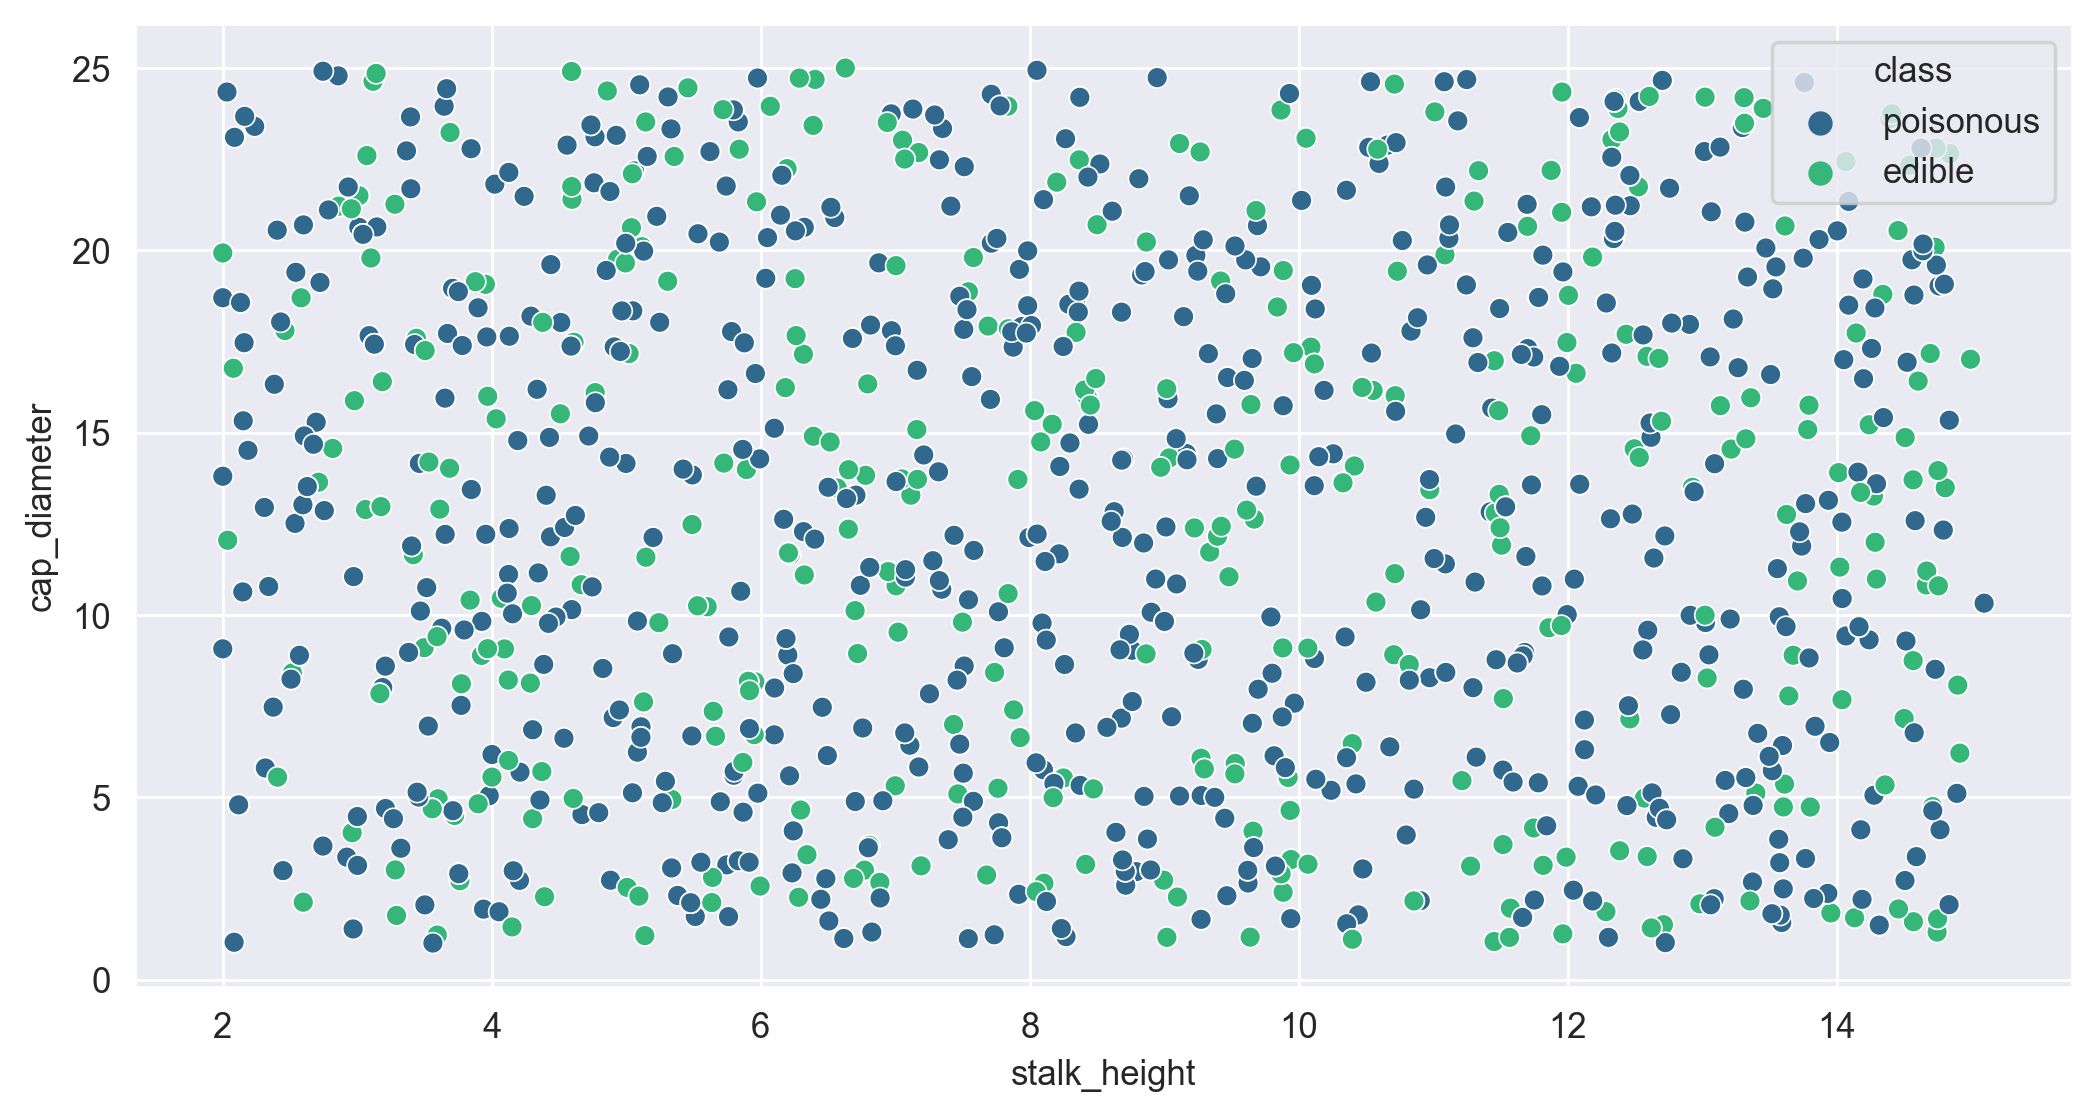

In [7]:
#2D scatterplot to understand the data.
sns.scatterplot(x= df['stalk_height'], y = df['cap_diameter'], hue=df['class'], palette='viridis')

In [ ]:
# check for duplicates

In [6]:
df.duplicated().sum()

1024

In [7]:
len(df)

2000

In [ ]:
# remove duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
len(df)

976

In [ ]:
# check missing values

In [11]:
df.isna().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

### Data Preprocessing:

In [17]:
# encoding categorical variables

In [12]:
from sklearn.preprocessing import  LabelEncoder

In [13]:
df.describe(include=object)

cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count        976         976       976     976   976             976   
unique         5           4         9       2     9               4   
top       sunken       scaly     brown     yes  foul            free   
freq         216         292       127     502   126             270   

       gill_spacing gill_size gill_color stalk_shape  ...  \
count           976       976        976         976  ...   
unique            3         2         12           2  ...   
top         crowded    narrow      green   enlarging  ...   
freq            330       498         96         524  ...   

       stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
count                     976                    976        976        976   
unique                      9                      9          2          4   
top                     brown                 yellow  universal      white   
freq                      127                    118        500        273   

       ring_number  ring_type spore_print_color population habitat      class  
count          976        976               976        976     976        976  
unique           3          8                 9          6       7          2  
top           none  sheathing             brown   abundant   urban  poisonous  
freq           342        135               122        176     153        618  

[4 rows x 23 columns]

In [14]:
data=df.select_dtypes(include=['object']).astype(str)
data

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1985   conical     grooves     brown      no     foul         notched   
1988      bell     grooves      pink     yes    anise      descending   
1989    sunken      smooth    purple     yes    anise      descending   
1996    sunken       scaly    purple     yes    musty        attached   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0         distant     broad       pink    tapering  ...   
1         crowded    narrow  chocolate   enlarging  ...   
2         crowded     broad     purple    tapering  ...   
3           close     broad     orange   enlarging  ...   
4         crowded    narrow     orange   enlarging  ...   
...           ...       ...        ...         ...  ...   
1985      crowded     broad  chocolate    tapering  ...   
1988      distant     broad      brown   enlarging  ...   
1989      crowded    narrow       buff    tapering  ...   
1996      distant    narrow        red    tapering  ...   
1999        close    narrow     purple   enlarging  ...   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                      gray                 yellow    partial      brown   
1                  cinnamon                  brown  universal      brown   
2                    yellow                   gray  universal     yellow   
3                    yellow                   pink    partial     yellow   
4                      gray                  white  universal      white   
...                     ...                    ...        ...        ...   
1985                    red                 yellow  universal      brown   
1988                   pink                   pink    partial      brown   
1989                  brown                    red  universal     orange   
1996                   pink                 orange    partial      white   
1999                   gray                  brown    partial      white   

     ring_number  ring_type spore_print_color population  habitat      class  
0            two  sheathing         chocolate  clustered    waste  poisonous  
1            two  sheathing             brown   numerous    waste     edible  
2            two  sheathing            purple   abundant    waste  poisonous  
3            two   cobwebby             green  clustered  grasses  poisonous  
4           none       none            yellow  clustered    urban  poisonous  
...          ...        ...               ...        ...      ...        ...  
1985        none      large             brown   numerous    paths     edible  
1988         two    pendant            yellow   numerous  grasses  poisonous  
1989         two       none            orange   abundant  grasses     edible  
1996         one       zone            yellow   numerous    waste  poisonous  
1999         two      large             white   numerous    urban  poisonous  

[976 rows x 23 columns]

In [15]:
le= LabelEncoder()

In [16]:
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [17]:
data

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0             4            2          7        0     1                1   
1             4            0          6        0     1                3   
2             3            1          5        1     4                1   
3             0            2          4        1     3                3   
4             3            3          8        1     5                2   
...         ...          ...        ...      ...   ...              ...   
1985          1            1          0        0     4                3   
1988          0            1          4        1     1                1   
1989          4            3          5        1     1                1   
1996          4            2          5        1     5                0   
1999          2            2          8        1     7                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0                2          0           7            1  ...   
1                1          1           3            0  ...   
2                1          0           8            1  ...   
3                0          0           6            0  ...   
4                1          1           6            0  ...   
...            ...        ...         ...          ...  ...   
1985             1          0           3            1  ...   
1988             2          0           1            0  ...   
1989             1          1           2            1  ...   
1996             2          1           9            1  ...   
1999             0          1           8            0  ...   

      stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                          3                       8          0           0   
1                          2                       0          1           0   
2                          8                       3          1           3   
3                          8                       5          0           3   
4                          3                       7          1           2   
...                      ...                     ...        ...         ...   
1985                       6                       8          1           0   
1988                       5                       5          0           0   
1989                       0                       6          1           1   
1996                       5                       4          0           2   
1999                       3                       0          0           2   

      ring_number  ring_type  spore_print_color  population  habitat  class  
0               2          6                  3           1        5      1  
1               2          6                  1           2        5      0  
2               2          6                  6           0        5      1  
3               2          0                  4           1        0      1  
4               0          4                  8           1        4      1  
...           ...        ...                ...         ...      ...    ...  
1985            0          3                  1           2        3      0  
1988            2          5                  8           2        0      1  
1989            2          4                  5           0        0      0  
1996            1          7                  8           2        5      1  
1999            2          3                  7           2        4      1  

[976 rows x 23 columns]

In [18]:
df = pd.concat([df, data], axis=1)
df

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0       sunken       scaly     white      no    anise      descending   
1       sunken     fibrous       red      no    anise         notched   
2         flat     grooves    purple     yes     foul      descending   
3         bell       scaly      pink     yes    fishy         notched   
4         flat      smooth    yellow     yes    musty            free   
...        ...         ...       ...     ...      ...             ...   
1985   conical     grooves     brown      no     foul         notched   
1988      bell     grooves      pink     yes    anise      descending   
1989    sunken      smooth    purple     yes    anise      descending   
1996    sunken       scaly    purple     yes    musty        attached   
1999    convex       scaly    yellow     yes  pungent      descending   

     gill_spacing gill_size gill_color stalk_shape  ...  \
0         distant     broad       pink    tapering  ...   
1         crowded    narrow  chocolate   enlarging  ...   
2         crowded     broad     purple    tapering  ...   
3           close     broad     orange   enlarging  ...   
4         crowded    narrow     orange   enlarging  ...   
...           ...       ...        ...         ...  ...   
1985      crowded     broad  chocolate    tapering  ...   
1988      distant     broad      brown   enlarging  ...   
1989      crowded    narrow       buff    tapering  ...   
1996      distant    narrow        red    tapering  ...   
1999        close    narrow     purple   enlarging  ...   

     stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                         3                      8         0          0   
1                         2                      0         1          0   
2                         8                      3         1          3   
3                         8                      5         0          3   
4                         3                      7         1          2   
...                     ...                    ...       ...        ...   
1985                      6                      8         1          0   
1988                      5                      5         0          0   
1989                      0                      6         1          1   
1996                      5                      4         0          2   
1999                      3                      0         0          2   

     ring_number ring_type spore_print_color population habitat class  
0              2         6                 3          1       5     1  
1              2         6                 1          2       5     0  
2              2         6                 6          0       5     1  
3              2         0                 4          1       0     1  
4              0         4                 8          1       4     1  
...          ...       ...               ...        ...     ...   ...  
1985           0         3                 1          2       3     0  
1988           2         5                 8          2       0     1  
1989           2         4                 5          0       0     0  
1996           1         7                 8          2       5     1  
1999           2         3                 7          2       4     1  

[976 rows x 48 columns]

In [19]:
df.drop(columns=['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],inplace=True)

In [20]:
df

stalk_height  cap_diameter
0        14.276173      5.054983
1         3.952715     19.068319
2         9.054265      7.205884
3         5.226499     20.932692
4        14.037532     12.545245
...            ...           ...
1985     13.020616      9.993008
1988      3.751597     18.868135
1989     13.134058     15.740028
1996      6.500840     13.501957
1999     13.066414     21.056642

[976 rows x 2 columns]

In [21]:
df = pd.concat([df, data], axis=1)
df

stalk_height  cap_diameter  cap_shape  cap_surface  cap_color  bruises  \
0        14.276173      5.054983          4            2          7        0   
1         3.952715     19.068319          4            0          6        0   
2         9.054265      7.205884          3            1          5        1   
3         5.226499     20.932692          0            2          4        1   
4        14.037532     12.545245          3            3          8        1   
...            ...           ...        ...          ...        ...      ...   
1985     13.020616      9.993008          1            1          0        0   
1988      3.751597     18.868135          0            1          4        1   
1989     13.134058     15.740028          4            3          5        1   
1996      6.500840     13.501957          4            2          5        1   
1999     13.066414     21.056642          2            2          8        1   

      odor  gill_attachment  gill_spacing  gill_size  ...  \
0        1                1             2          0  ...   
1        1                3             1          1  ...   
2        4                1             1          0  ...   
3        3                3             0          0  ...   
4        5                2             1          1  ...   
...    ...              ...           ...        ...  ...   
1985     4                3             1          0  ...   
1988     1                1             2          0  ...   
1989     1                1             1          1  ...   
1996     5                0             2          1  ...   
1999     7                1             0          1  ...   

      stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                          3                       8          0           0   
1                          2                       0          1           0   
2                          8                       3          1           3   
3                          8                       5          0           3   
4                          3                       7          1           2   
...                      ...                     ...        ...         ...   
1985                       6                       8          1           0   
1988                       5                       5          0           0   
1989                       0                       6          1           1   
1996                       5                       4          0           2   
1999                       3                       0          0           2   

      ring_number  ring_type  spore_print_color  population  habitat  class  
0               2          6                  3           1        5      1  
1               2          6                  1           2        5      0  
2               2          6                  6           0        5      1  
3               2          0                  4           1        0      1  
4               0          4                  8           1        4      1  
...           ...        ...                ...         ...      ...    ...  
1985            0          3                  1           2        3      0  
1988            2          5                  8           2        0      1  
1989            2          4                  5           0        0      0  
1996            1          7                  8           2        5      1  
1999            2          3                  7           2        4      1  

[976 rows x 25 columns]

In [ ]:
# split the data into training and testing sets

In [22]:
y=df['class']
y

0       1
1       0
2       1
3       1
4       1
       ..
1985    0
1988    1
1989    0
1996    1
1999    1
Name: class, Length: 976, dtype: int32

In [25]:
x=df.iloc[:,:-1]

In [26]:
x

stalk_height  cap_diameter  cap_shape  cap_surface  cap_color  bruises  \
0        14.276173      5.054983          4            2          7        0   
1         3.952715     19.068319          4            0          6        0   
2         9.054265      7.205884          3            1          5        1   
3         5.226499     20.932692          0            2          4        1   
4        14.037532     12.545245          3            3          8        1   
...            ...           ...        ...          ...        ...      ...   
1985     13.020616      9.993008          1            1          0        0   
1988      3.751597     18.868135          0            1          4        1   
1989     13.134058     15.740028          4            3          5        1   
1996      6.500840     13.501957          4            2          5        1   
1999     13.066414     21.056642          2            2          8        1   

      odor  gill_attachment  gill_spacing  gill_size  ...  \
0        1                1             2          0  ...   
1        1                3             1          1  ...   
2        4                1             1          0  ...   
3        3                3             0          0  ...   
4        5                2             1          1  ...   
...    ...              ...           ...        ...  ...   
1985     4                3             1          0  ...   
1988     1                1             2          0  ...   
1989     1                1             1          1  ...   
1996     5                0             2          1  ...   
1999     7                1             0          1  ...   

      stalk_surface_below_ring  stalk_color_above_ring  \
0                            2                       3   
1                            2                       2   
2                            2                       8   
3                            1                       8   
4                            1                       3   
...                        ...                     ...   
1985                         2                       6   
1988                         0                       5   
1989                         2                       0   
1996                         0                       5   
1999                         1                       3   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1985                       8          1           0            0          3   
1988                       5          0           0            2          5   
1989                       6          1           1            2          4   
1996                       4          0           2            1          7   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  
0                     3           1        5  
1                     1           2        5  
2                     6           0        5  
3                     4           1        0  
4                     8           1        4  
...                 ...         ...      ...  
1985                  1           2        3  
1988                  8           2        0  
1989                  5           0        0  
1996                  8           2        5  
1999                  7           2        4  

[976 rows x 24 columns]

In [ ]:
# scaling the data

In [28]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
x

array([[ 1.55397552, -1.08020133,  1.35139853, ..., -0.37063718,
        -0.83364241,  0.99462141],
       [-1.23528506,  0.92643459,  1.35139853, ..., -1.13219905,
        -0.24955412,  0.99462141],
       [ 0.14308581, -0.77220366,  0.65279421, ...,  0.77170563,
        -1.4177307 ,  0.99462141],
       ...,
       [ 1.24539141,  0.44984086,  1.35139853, ...,  0.39092469,
        -1.4177307 , -1.57622207],
       [-0.54681571,  0.12936088,  1.35139853, ...,  1.5332675 ,
        -0.24955412,  0.99462141],
       [ 1.22711479,  1.21115202, -0.04581012, ...,  1.15248656,
        -0.24955412,  0.48045272]])

In [32]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [37]:
xtrain

array([[-1.22205872, -0.92033097,  0.65279421, ..., -0.75141812,
         1.50271076, -0.03371598],
       [ 0.86453497,  0.33134011, -0.04581012, ..., -1.51297999,
         0.33453418, -1.57622207],
       [-1.60121127, -1.50033508,  0.65279421, ...,  1.5332675 ,
        -1.4177307 , -1.57622207],
       ...,
       [ 1.67691939, -0.58569864, -0.04581012, ..., -1.51297999,
        -0.24955412,  0.48045272],
       [ 1.61460603, -0.77889442, -0.74441445, ...,  0.01014375,
         1.50271076,  1.50879011],
       [ 0.64335082, -0.35185795,  1.35139853, ..., -1.51297999,
        -1.4177307 , -1.57622207]])

In [38]:
xtest

array([[ 1.20427854, -1.50691344, -0.74441445, ..., -1.51297999,
         0.91862247,  0.48045272],
       [-0.03165867,  0.5116431 , -0.04581012, ...,  1.5332675 ,
         0.33453418, -0.54788468],
       [-0.95064781, -1.44235239, -1.44301877, ...,  0.39092469,
         0.91862247,  0.99462141],
       ...,
       [-1.01510816,  1.5056935 ,  1.35139853, ..., -0.37063718,
        -0.83364241,  0.99462141],
       [ 0.87976011, -1.0313055 , -0.74441445, ...,  0.77170563,
        -0.24955412, -1.06205337],
       [-0.61249666,  1.13646815, -0.74441445, ..., -0.37063718,
        -0.83364241,  0.99462141]])

In [40]:
ytrain

254     1
1182    0
193     0
988     1
61      1
       ..
1224    1
74      1
1701    1
262     0
38      1
Name: class, Length: 780, dtype: int32

In [41]:
ytest

1804    0
1079    0
690     0
6       1
276     1
       ..
211     0
1638    1
768     1
503     1
1324    1
Name: class, Length: 196, dtype: int32

### Data Visualization

In [35]:
sns.pairplot(df)

### SVM Implementation

In [ ]:
#Train the SVM model on the training data

In [42]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [43]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.8807692307692307
0.5714285714285714


In [ ]:
# Evaluate the Metrics

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.30      0.04      0.07        80
           1       0.59      0.94      0.72       116

    accuracy                           0.57       196
   macro avg       0.44      0.49      0.39       196
weighted avg       0.47      0.57      0.45       196



### Parameter Tuning and Optimization

In [ ]:
#With help of GrideSearchCV -> Kernel

In [47]:
from sklearn.model_selection import GridSearchCV

In [58]:
param = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}

In [59]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)

In [60]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=1)

In [61]:
grid.best_params_

{'kernel': 'linear'}

In [69]:
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.6435897435897436
0.5918367346938775


In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.59      1.00      0.74       116

    accuracy                           0.59       196
   macro avg       0.30      0.50      0.37       196
weighted avg       0.35      0.59      0.44       196



### Comparison and Analysis

* Strengths of SVM for the Mushroom Dataset:

Effective in high-dimensional spaces:
The Mushroom dataset has a significant number of categorical variables, which can be one-hot encoded into a high-dimensional space. SVMs tend to perform well in high-dimensional feature spaces by finding the optimal hyperplane that separates classes.

Good performance with a clear margin of separation:
If the EDA and visualizations reveal a distinct separation between the poisonous and edible mushroom classes in the feature space, SVM is likely to perform well. Its ability to maximize the margin between classes would be advantageous.

* Weaknesses of SVM for the Mushroom Dataset:

Handling categorical data:
SVM is inherently designed for numerical data, so categorical data in the Mushroom dataset (such as cap-color, odor, gill-size) must be transformed into numerical form (e.g., one-hot encoding). This transformation can increase the dimensionality significantly, leading to sparse data, which might affect SVM’s performance or training time.

Computational cost for large datasets:
If the Mushroom dataset is large, SVM may become computationally expensive, especially when using non-linear kernels. Training time and memory usage may increase significantly as the dataset grows.

* Visualization Insights:

Linearly separable data: If visualizations show that the poisonous and edible mushrooms are linearly separable in the transformed feature space, SVM will be highly effective with a linear kernel.

Clusters and non-linearity: If visualizations indicate that data points form clusters or exhibit non-linear patterns, SVM with non-linear kernels (such as RBF) may provide better classification performance.

In [ ]:
# Discuss practical implications of SVM in real-world classification tasks.